<a href="https://colab.research.google.com/github/RohanPawar3399/Synchronization-problem/blob/main/lbp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import PIL
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
warnings.simplefilter('ignore')

In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics
from ultralytics import YOLO
yolo_model = YOLO('yolov8m.pt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Set the directory path
directory_path = '/content/drive/My Drive/Colab Notebooks/task1train540p/'

# List the contents of the directory
contents = os.listdir(directory_path)

# Filter only image files
image_files = [file for file in contents if file.endswith(('.jpg', '.jpeg', '.png'))]

# Choose random images
num_samples = 4
random_image = random.sample(image_files, num_samples)

# Plot the random images
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    image_path = os.path.join(directory_path, random_image[i])
    print(image_path)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
    plt.subplot(2, 2, i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()


In [ ]:
images = []
directory_path = '/content/drive/My Drive/Colab Notebooks/task1train540p/'
for i in range(num_samples):
    image_path = os.path.join(directory_path, random_image[i])
    image_pil = Image.open(image_path)
    yolo_outputs = yolo_model.predict(image_pil)
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names

    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        #print(f'In this image {len(box)} objects has been detected.')
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')

    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])



-------------------------------------- Images after object detection with myLBP --------------------------------


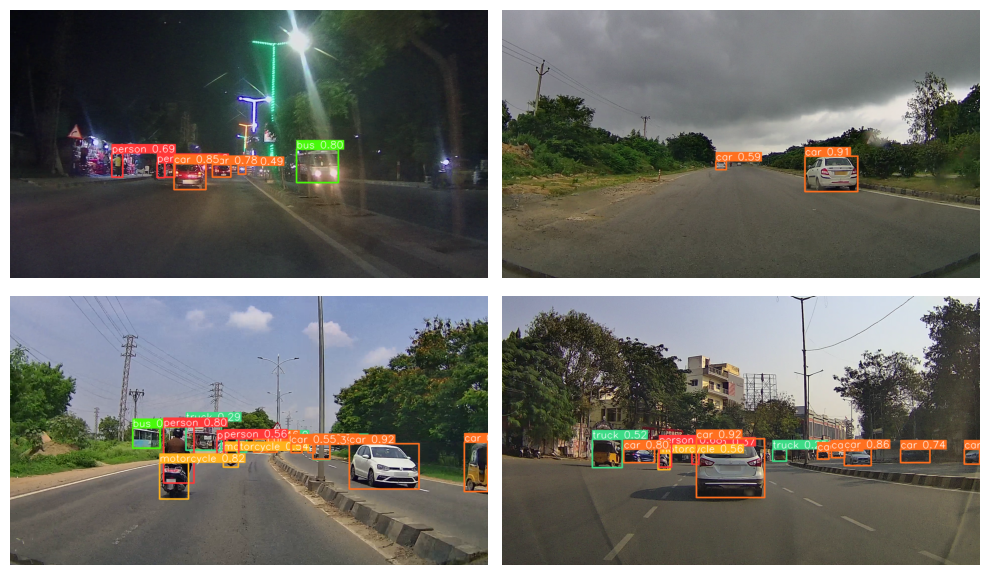

In [55]:
print('\n\n-------------------------------------- Images after object detection with myLBP --------------------------------')

plt.figure(figsize=(10,6))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()